# Выбор модели
### Необходимые пакеты

In [1]:
import pandas as pd
import seaborn as se  
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report,plot_confusion_matrix

%matplotlib inline

### Инициализация

Filepath of CSV file

In [18]:
#filepath
file_path= "telco-customer-churn.csv"

### Выборка данных

Pandas - это библиотека с открытым исходным кодом и лицензией BSD, предоставляющая высокопроизводительные, простые в использовании инструменты для манипулирования данными и анализа данных.

Мы будем использовать библиотеку Pandas для чтения CSV-файла, используя его путь хранения. И мы используем функцию head для отображения начальной строки или записи.

In [19]:
df=pd.read_csv(file_path)
df.head()

,age,annualincome,calldroprate,callfailurerate,callingnum,customerid,customersuspended,education,gender,homeowner,...,totalminsusedinlastmonth,unpaidbalance,usesinternetservice,usesvoiceservice,percentagecalloutsidenetwork,totalcallduration,avgcallduration,churn,year,month
0,12,168147,0.06,0.00,4251078442,1,Yes,Bachelor or equivalent,Male,Yes,...,15,19,No,No,0.82,5971,663,0,2015,1
1,12,168147,0.06,0.00,4251078442,1,Yes,Bachelor or equivalent,Male,Yes,...,15,19,No,No,0.82,3981,995,0,2015,2
2,42,29047,0.05,0.01,4251043419,2,Yes,Bachelor or equivalent,Female,Yes,...,212,34,No,Yes,0.27,7379,737,0,2015,1
3,42,29047,0.05,0.01,4251043419,2,Yes,Bachelor or equivalent,Female,Yes,...,212,34,No,Yes,0.27,1729,432,0,2015,2
4,58,27076,0.07,0.02,4251055773,3,Yes,Master or equivalent,Female,Yes,...,216,144,No,No,0.48,3122,624,0,2015,1


Просмотр формата серий

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20468 entries, 0 to 20467
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   20468 non-null  int64  
 1   annualincome                          20468 non-null  int64  
 2   calldroprate                          20468 non-null  float64
 3   callfailurerate                       20468 non-null  float64
 4   callingnum                            20468 non-null  int64  
 5   customerid                            20468 non-null  int64  
 6   customersuspended                     20468 non-null  object 
 7   education                             20468 non-null  object 
 8   gender                                20468 non-null  object 
 9   homeowner                             20468 non-null  object 
 10  maritalstatus                         20468 non-null  object 
 11  monthlybilledam

Просмотр количества уникальных значений

In [21]:
df.nunique()

age                                       68
annualincome                            9508
calldroprate                               8
callfailurerate                            4
callingnum                              9525
customerid                              9525
customersuspended                          2
education                                  4
gender                                     2
homeowner                                  2
maritalstatus                              2
monthlybilledamount                      120
noadditionallines                          1
numberofcomplaints                         4
numberofmonthunpaid                        8
numdayscontractequipmentplanexpiring     100
occupation                                 3
penaltytoswitch                          500
state                                     50
totalminsusedinlastmonth                 500
unpaidbalance                            250
usesinternetservice                        2
usesvoices

### Отбор признаков

Это процесс сокращения числа входных переменных при разработке прогностической модели. Используется для уменьшения числа входных переменных как для снижения вычислительных затрат на моделирование, так и, в некоторых случаях, для повышения эффективности модели.

Назначим все необходимые входные признаки на X, а цель/результат - на Y.


In [22]:
X = df.drop(['churn', 'year', 'month', 'callingnum'],axis=1)
Y = df.churn

Поиск баланса меток в наборе данных

In [23]:
print('Labels: {}'.format(set(Y)))
print('Zero count = {}, One count = {}'.format(len(Y) - sum(Y), sum(Y)))

Labels: {0, 1}
Zero count = 18605, One count = 1863


Декларация категориальных признаков

In [24]:
categorical_columns = list(X.select_dtypes(include=['object']).columns.values.tolist())

### Предварительная обработка данных

Поскольку большинство моделей машинного обучения в библиотеке Sklearn не обрабатывают строковые значениия и NaN-значения, нам приходится явно удалять или заменять NaN-значения. В приведенном ниже фрагменте есть функции, которые удаляют нулевое значение, если таковое существует. И преобразуют данные строковых классов в наборе данных, кодируя их в целочисленные классы.

In [25]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)
def EncodeY(df):
    if len(df.unique())<=2:
        return df
    else:
        un_EncodedT=np.sort(pd.unique(df), axis=-1, kind='mergesort')
        df=LabelEncoder().fit_transform(df)
        EncodedT=[xi for xi in range(len(un_EncodedT))]
        print("Encoded Target: {} to {}".format(un_EncodedT,EncodedT))
        return df

In [26]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])  
X=EncodeX(X)
Y=EncodeY(NullClearner(Y))
X.head()

,age,annualincome,calldroprate,callfailurerate,customerid,monthlybilledamount,numberofcomplaints,numberofmonthunpaid,numdayscontractequipmentplanexpiring,penaltytoswitch,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,usesinternetservice_No,usesinternetservice_Yes,usesvoiceservice_No,usesvoiceservice_Yes
0,12,168147,0.06,0.00,1,71,0,7,96,371,...,0,0,1,0,0,0,1,0,1,0
1,12,168147,0.06,0.00,1,71,0,7,96,371,...,0,0,1,0,0,0,1,0,1,0
2,42,29047,0.05,0.01,2,8,1,4,14,43,...,0,0,0,1,0,0,1,0,0,1
3,42,29047,0.05,0.01,2,8,1,4,14,43,...,0,0,0,1,0,0,1,0,0,1
4,58,27076,0.07,0.02,3,16,0,2,55,403,...,0,0,0,0,0,0,1,0,1,0


### Разделение данных

Разделение данных на тренировочные и тестовые - это процедура оценки эффективности алгоритма. Процедура включает в себя взятие набора данных и разделение его на два подмножества. Первое подмножество используется для подгонки/обучения модели. Второе подмножество используется для прогнозирования. Основным мотивом является оценка эффективности модели на новых данных.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 12, stratify=Y)

### Xgboost vs Catboost vs Lightgbm

Строим базовые модели чтобы получить представление о диапазоне точности и полноты моделей алгоритмов градиентного бустинга

Вспомогательные функции метрик алгоритмов

In [31]:
from sklearn.metrics import auc, roc_curve, precision_recall_curve, log_loss
from sklearn.metrics import precision_score, recall_score, f1_score

def metrics(clf_name, thresh, ordered_dict):
    probs = clf_name.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, probs)
    aucroc = auc(fpr, tpr)
    pre, rec, _ = precision_recall_curve(y_test, probs)
    aucpr = auc(rec, pre)
    logloss = log_loss(y_test, probs)
    print('AUCROC:    {:.3f}'.format(aucroc))
    print('AUCPR:     {:.3f}'.format(aucpr))
    print('Logloss:   {:.3f}'.format(logloss))
    preds = (clf_name.predict_proba(X_test)[:, 1] > thresh).astype('int')
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    print('Precision: {0:.3f}'.format(precision))
    print('Recall:    {0:.3f}'.format(recall))
    print('F1-score:  {0:.3f}'.format(f1))
    if clf_name == clf_xgb:
        print('Best iteration:  {} rounds'.format((clf_name.best_iteration)))
    elif clf_name == clf_lgbm:
        print('Best iteration:  {} rounds'.format((clf_name.best_iteration_)))
    elif clf_name == clf_cat:
        print('Best iteration:  {} rounds'.format((clf_name.best_iteration_)))
    elif clf_name == pipe_svm:
        pass
    ordered_dict['AUCROC'] = round(aucroc, 3)
    ordered_dict['AUCPR'] = round(aucpr, 3)
    ordered_dict['Logloss'] = round(logloss, 3)
    ordered_dict['Precision'] = round(precision, 3)
    ordered_dict['Recall'] = round(recall, 3)
    ordered_dict['F1_score'] = round(f1, 3)
    
def plot_roc_pr(clf_name):
    """Plot the ROC and PR-curve for a given classifier."""
    plt.figure(figsize=(14, 7))
    # Plot ROC
    plt.subplot(121)
    probs = clf_name.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    aucroc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label='AUCROC = %0.3f' % aucroc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    # Plot PR curve
    plt.subplot(122)
    precision, recall, threshs = precision_recall_curve(y_test, probs)
    aucpr = auc(recall, precision)
    plt.title('Precision-Recall Curve')
    plt.plot(recall, precision, 'b', label='AUCPR = %0.3f' % aucpr)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0.5, 0.5], 'r--')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.show()
    
def plot_thresh_roc_pr(thresholds, costs, best_threshold, lowest_cost, clf_name):
    plt.figure(figsize=(28, 10))
    # Plot optimal threshold
    plt.subplot(131)
    plt.plot(thresholds, costs, c='red', label='cost')
    plt.plot([0, 1], [lowest_cost, lowest_cost], 'k-', label='lowest cost')
    plt.plot([best_threshold, best_threshold], [0, lowest_cost], 'k-')
    plt.ylim([40, 150])
    plt.legend()
    plt.title('Threshold Cost')
    plt.xlabel('Score Threshold')
    plt.ylabel('Cost')
    
    # Plot ROC
    plt.subplot(132)
    probs = clf_name.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    aucroc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label='AUCROC = %0.3f' % aucroc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
    # Plot PR
    plt.subplot(133)
    precision, recall, threshs = precision_recall_curve(y_test, probs)
    aucpr = auc(recall, precision)
    plt.title('Precision-Recall Curve')
    plt.plot(recall, precision, 'b', label='AUCPR = %0.3f' % aucpr)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0.5, 0.5], 'r--')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.show()

## XGBoost Model

C:\Users\Mi\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


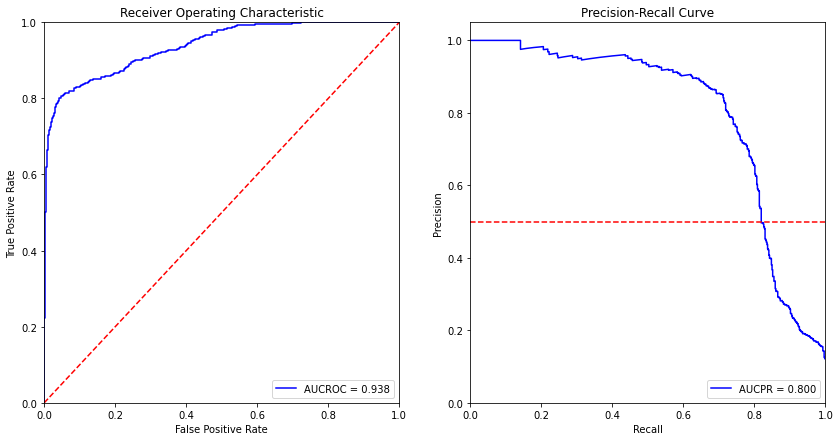

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5582
           1       0.96      0.40      0.57       559

    accuracy                           0.94      6141
   macro avg       0.95      0.70      0.77      6141
weighted avg       0.94      0.94      0.93      6141

Training time:   2.45 sec.
Prediction time: 0.00 sec.


In [32]:
from xgboost import XGBClassifier
from collections import OrderedDict
from time import time

# Instantiate classifier
clf_xgb = XGBClassifier()

# Fit classifier
xgbt0 = time()
clf_xgb.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    eval_metric=['logloss', 'aucpr', 'auc'],          
    early_stopping_rounds=10,
    verbose=False
)
xgb_trainingtime = time()-xgbt0

# Output and plot evaluation metrics
xgb_evals_dict = OrderedDict()
plot_roc_pr(clf_xgb)
xgbt1 = time()
xgb_predictiontime = time()-xgbt1
print(classification_report(y_test,clf_xgb.predict(X_test)))
print('Training time:   {:.2f} sec.'.format(xgb_trainingtime))
print('Prediction time: {:.2f} sec.'.format(xgb_predictiontime))

## LightGBM Model

C:\Users\Mi\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Mi\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


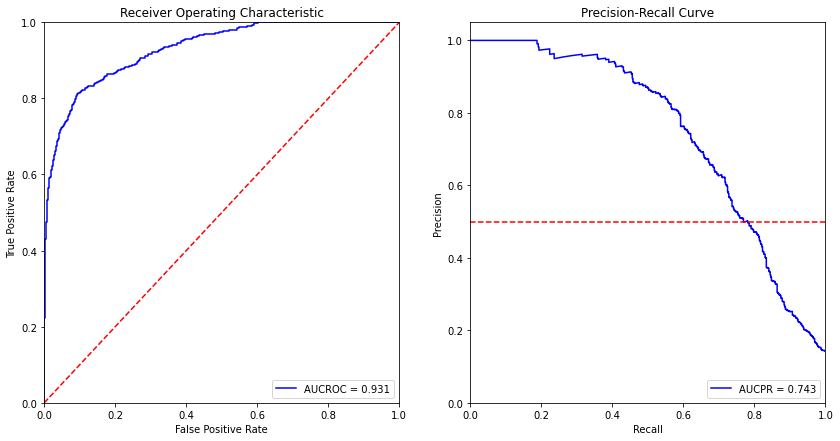

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      5582
           1       1.00      0.12      0.21       559

    accuracy                           0.92      6141
   macro avg       0.96      0.56      0.58      6141
weighted avg       0.93      0.92      0.89      6141

Training time:   0.35 sec.
Prediction time: 0.00 sec.


In [33]:
from lightgbm import LGBMClassifier

# Instantiate classifier
clf_lgbm = LGBMClassifier()

# Fit classifier
lgbmt0 = time()
clf_lgbm.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    eval_metric=['logloss', 'aucpr', 'auc'],    
    early_stopping_rounds=10,
    verbose=False
)
lgbm_trainingtime = time()-lgbmt0


# Output and plot evaluation metrics
lgbm_evals_dict = OrderedDict()
plot_roc_pr(clf_lgbm)
lgbmt1 = time()
lgbm_predictiontime = time()-lgbmt1
print(classification_report(y_test,clf_lgbm.predict(X_test)))
print('Training time:   {:.2f} sec.'.format(lgbm_trainingtime))
print('Prediction time: {:.2f} sec.'.format(lgbm_predictiontime))


## CatBoost Model

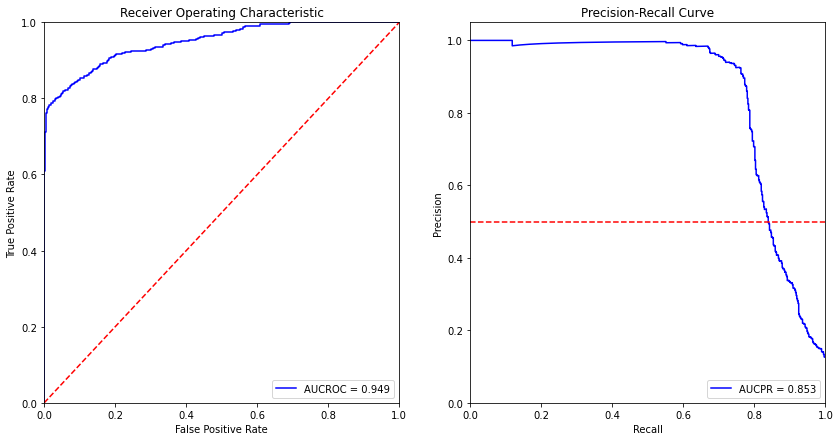

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5582
           1       1.00      0.47      0.63       559

    accuracy                           0.95      6141
   macro avg       0.97      0.73      0.80      6141
weighted avg       0.95      0.95      0.94      6141

Training time:   6.61 sec.
Prediction time: 0.00 sec.


In [16]:
from catboost import CatBoostClassifier

# Instantiate classifier
clf_cat = CatBoostClassifier()

# Fit classifier
catt0 = time()
clf_cat.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    early_stopping_rounds=10,   
    use_best_model=True,
    verbose=0,
    plot=False                     
)
cat_trainingtime = time()-catt0


# Output evaluation metrics 
cat_evals_dict = OrderedDict()
plot_roc_pr(clf_cat)
catt1 = time()
cat_predictiontime = time()-catt1
print(classification_report(y_test,clf_cat.predict(X_test)))
print('Training time:   {:.2f} sec.'.format(cat_trainingtime))
print('Prediction time: {:.2f} sec.'.format(cat_predictiontime))

#### Отчет о классификации

Отчет о классификации используется для измерения качества предсказаний алгоритма классификации. Сколько предсказаний являются истинными, сколько - ложными.

* **где:**:
    - Precision:- Точность положительных предсказаний.
    - Recall:- доля положительных прогнозов, которые были определены правильно.
    - f1-score:-  процент правильных положительных предсказаний.
    - support:- поддержка - это количество фактических вхождений класса в заданный набор данных.

## Вывод

CatBoost Model показала наивысший результат и время обучения, но библиотека имеет широкий функционал для оптимизации и при обучении на стандартных датасетах показывает наилучший результат при наименьшем времени обучения.
Далее см. CatBoostClassifier.ipynb.